In [ ]:
# Descomprimir el archivo zip cargado en Google Colab
import zipfile
import os

# Ruta al archivo ZIP cargado
zip_file_path = '/archive.zip'  # Asegúrate de cambiar el nombre si es diferente

# Ruta de destino para extraer los archivos
extract_dir = '/plantdisease'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Archivos extraídos en: {extract_dir}")


Archivos extraídos en: /plantdisease


Found 16011 images belonging to 10 classes.
Found 16011 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 228s 441ms/step - accuracy: 0.3810 - loss: 1.7775 - val_accuracy: 0.6418 - val_loss: 1.0365
Epoch 2/10
  1/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.7812 - loss: 0.7335

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.7812 - loss: 0.7335 - val_accuracy: 0.7433 - val_loss: 0.7389
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 226s 440ms/step - accuracy: 0.7100 - loss: 0.8324 - val_accuracy: 0.6597 - val_loss: 1.0822
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7812 - loss: 0.7467 - val_accuracy: 0.6931 - val_loss: 0.9674
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 263s 491ms/step - accuracy: 0.7796 - loss: 0.6240 - val_accuracy: 0.7509 - val_loss: 0.9646
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.7500 - loss: 0.6678 - val_accuracy: 0.7604 - val_loss: 0.8625
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 258s 516ms/step - accuracy: 0.8216 - loss: 0.5056 - val_accuracy: 0.8163 - val_loss: 0.6037
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9062 - loss: 0.4079 - val_accuracy: 0.8159 - val_loss: 0.5874
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 453ms/step - accuracy: 0.8492 - loss: 0.4234 - val

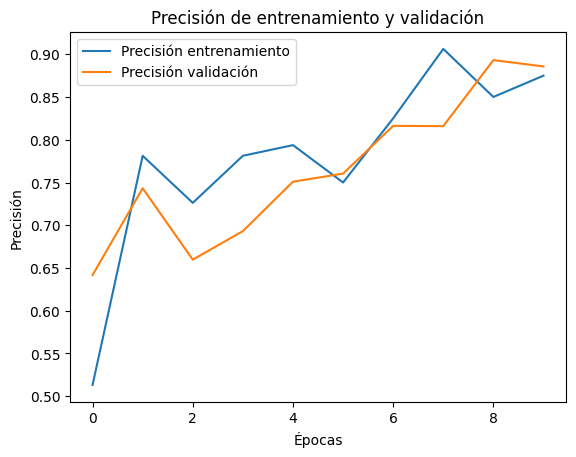

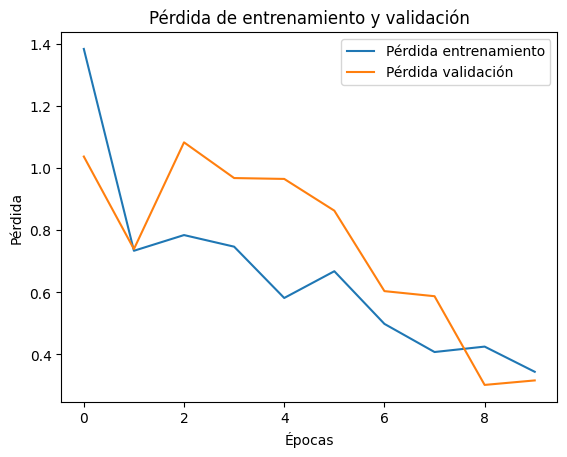

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directorio de datos
train_dir = '/plantdisease/PlantVillage'
test_dir = '/plantdisease/PlantVillage'

# Crear generadores de datos para el entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Escala las imágenes entre 0 y 1
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)  # Solo reescala para el conjunto de prueba

# Cargar las imágenes de las clases de tomate
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Redimensionar las imágenes a 224x224
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Redimensionar las imágenes a 224x224
    batch_size=32,
    class_mode='categorical')

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 clases de enfermedades
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Evaluar el modelo en el conjunto de validación
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Precisión en el conjunto de validación: {validation_accuracy:.4f}")
print(f"Pérdida en el conjunto de validación: {validation_loss:.4f}")

# Visualización de los resultados de entrenamiento y validación
# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de entrenamiento y validación')
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida de entrenamiento y validación')
plt.show()


Saving 000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG to 000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


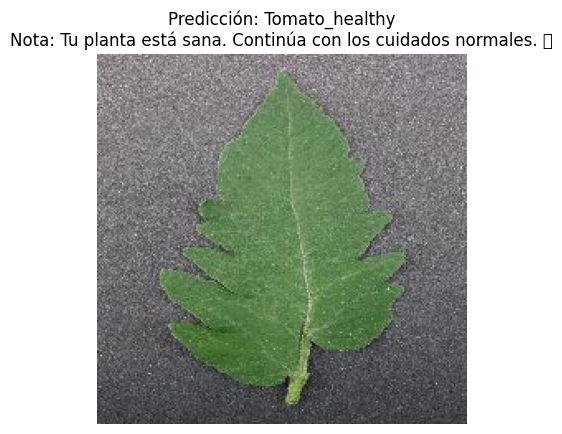

La enfermedad detectada es: Tomato_healthy
🔹 Nota: Tu planta está sana. Continúa con los cuidados normales. 🌿


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files  # Para subir imágenes en Colab

# 1. Subir imagen desde el equipo
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Obtener la ruta de la imagen subida

# 2. Cargar la imagen y redimensionarla
img = image.load_img(img_path, target_size=(224, 224))

# 3. Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# 4. Aplicar un filtro de reducción de ruido (Filtro Bilateral)
img_array_denoised = cv2.bilateralFilter(img_array.astype(np.uint8), d=9, sigmaColor=25, sigmaSpace=25)

# 5. Preprocesar la imagen
img_array_denoised = np.expand_dims(img_array_denoised, axis=0)  # Añade una dimensión para compatibilidad
img_array_denoised = img_array_denoised / 255.0  # Normaliza la imagen

# 6. Realizar la predicción
predicciones = model.predict(img_array_denoised)

# 7. Obtener la clase con mayor probabilidad
clase_predicha = np.argmax(predicciones, axis=1)

# 8. Diccionario de clases
clases = train_generator.class_indices
clases = {v: k for k, v in clases.items()}

# 9. Diccionario de remedios naturales según la enfermedad detectada
remedios_naturales = {
    "Tomato_Bacterial_spot": "Aplica una solución de bicarbonato de sodio con agua en las hojas.",
    "Tomato_Early_blight": "Usa extracto de ajo o una infusión de cola de caballo para rociar las hojas.",
    "Tomato_Late_blight": "Aplica una mezcla de leche diluida en agua (1:10) como fungicida natural.",
    "Tomato_Leaf_Mold": "Mejora la ventilación de las plantas y usa una solución de vinagre con agua.",
    "Tomato_Septoria_leaf_spot": "Prepara un té de manzanilla y úsalo como spray antifúngico.",
    "Tomato_Spider_mites_Two_spotted_spider_mite": "Rocía agua con jabón potásico para eliminar los ácaros.",
    "Tomato__Target_Spot": "Aplica aceite de neem para reducir la propagación del hongo.",
    "Tomato__Tomato_YellowLeaf__Curl_Virus": "No tiene cura, pero puedes controlar vectores como la mosca blanca.",
    "Tomato__Tomato_mosaic_virus": "Evita la propagación eliminando hojas infectadas y desinfectando herramientas.",
    "Tomato_healthy": "Tu planta está sana. Continúa con los cuidados normales. 🌿"
}

# 10. Obtener la enfermedad detectada y su remedio
enfermedad_detectada = clases[clase_predicha[0]]
remedio = remedios_naturales.get(enfermedad_detectada, "No se encontró información para esta enfermedad.")

# 11. Mostrar la imagen con el resultado
plt.imshow(img)
plt.title(f"Predicción: {enfermedad_detectada}\nNota: {remedio}")
plt.axis('off')
plt.show()

# 12. Mostrar el resultado en texto
print(f"La enfermedad detectada es: {enfermedad_detectada}")
print(f"🔹 Nota: {remedio}")
